In [1]:
import os

import csv
import cv2
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg

In [2]:
data_path='data'
label_path='data/driving_log.csv'

In [3]:
import pandas as pd
import numpy as np

dataset=pd.read_csv(label_path)
dataset.head()

,C:\Users\Sandalika\Documents\deep learning workshop\day06\data\IMG\center_2024_08_20_17_16_59_661.jpg,C:\Users\Sandalika\Documents\deep learning workshop\day06\data\IMG\left_2024_08_20_17_16_59_661.jpg,C:\Users\Sandalika\Documents\deep learning workshop\day06\data\IMG\right_2024_08_20_17_16_59_661.jpg,0,0.1,0.2,3.177122E-06
0,C:\Users\Sandalika\Documents\deep learning wor...,C:\Users\Sandalika\Documents\deep learning wor...,C:\Users\Sandalika\Documents\deep learning wor...,0.0,0.0,0.0,0.000014
1,C:\Users\Sandalika\Documents\deep learning wor...,C:\Users\Sandalika\Documents\deep learning wor...,C:\Users\Sandalika\Documents\deep learning wor...,0.0,0.0,0.0,0.000011
2,C:\Users\Sandalika\Documents\deep learning wor...,C:\Users\Sandalika\Documents\deep learning wor...,C:\Users\Sandalika\Documents\deep learning wor...,0.0,0.0,0.0,0.000037
3,C:\Users\Sandalika\Documents\deep learning wor...,C:\Users\Sandalika\Documents\deep learning wor...,C:\Users\Sandalika\Documents\deep learning wor...,0.0,0.0,0.0,0.000002
4,C:\Users\Sandalika\Documents\deep learning wor...,C:\Users\Sandalika\Documents\deep learning wor...,C:\Users\Sandalika\Documents\deep learning wor...,0.0,0.0,0.0,0.000003


In [4]:
dataset=dataset.values
data=dataset[:,:3]
target=dataset[:,3]

In [5]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [6]:
def load_image(data_dir,image_file):
    return mpimg.imread(os.path.join(data_dir,image_file.strip()))

0.0


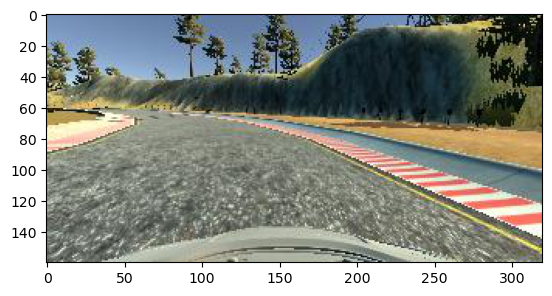

In [7]:
img=load_image(data_path,test_data[0][0]) #first image center image path
plt.imshow(img)
steering_angle=test_target[0]
print(steering_angle)

In [8]:
#data preprocessing
IMAGE_HEIGHT,IMAGE_WIDTH,IMAGE_CHANNELS=66,200,3
INPUT_SHAPE=(IMAGE_HEIGHT,IMAGE_WIDTH,IMAGE_CHANNELS)

In [9]:
def preprocess(img):
    #cropping the image(removing the sky and the car bonet)
    img=img[60:-25,:,:]
    #resizing the image
    img=cv2.resize(img,(IMAGE_WIDTH,IMAGE_HEIGHT),cv2.INTER_AREA)
    #converting the image to YUV
    img=cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    return img

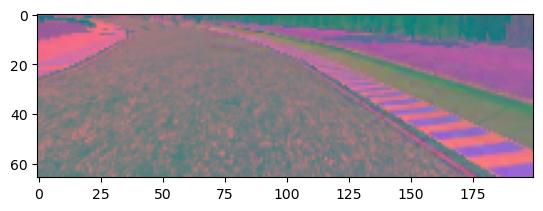

In [10]:
preprocessed_img=preprocess(img)
plt.imshow(preprocessed_img)

In [24]:
#data augmentation
#if right image or left image comes we need to adjust the steering angle a bit

def random_adjust(data_dir,center,left,right,steering_angle):
    choice =np.random.choice(3)
    if choice==0:
        return load_image(data_dir,left),steering_angle+0.2
    elif choice==1:
        return load_image(data_dir,left),steering_angle-0.2
    return load_image(data_dir,center),steering_angle
        

-0.2


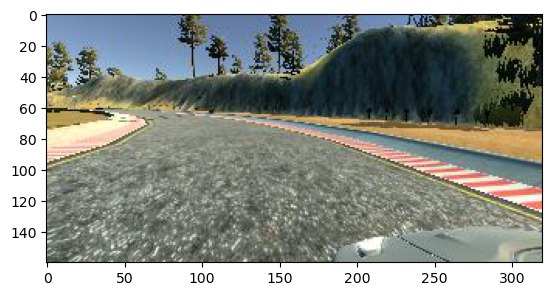

In [26]:
#one row has three images(left,center, right), we send data_path, left image path,center image path,right image path,steering angle
adjusted_img,adjusted_str=random_adjust(data_path,test_data[0][2],test_data[0][1],test_data[0][0],test_target[0])
plt.imshow(adjusted_img)
print(adjusted_str)

In [28]:
def display(image, angle,label):
    plt.imshow(image)
    plt.xlabel("Steering angle:{:.5f}".format(angle))
    plt.title(label)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    

In [30]:
#generate a randm value and flip the image(not always)
def random_flip(image, steering_angle):
    if np.random.rand()<0.5:
        image=cv2.flip(image, 1)
        steering_angle=-steering_angle
    return image, steering_angle

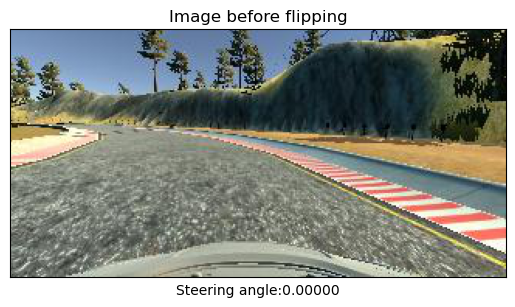

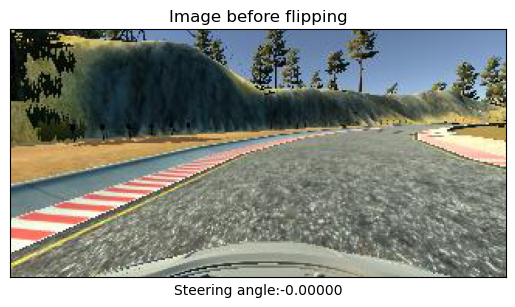

In [32]:
label="Image before flipping"
display(img, steering_angle, label)

flipped_img, flipped_str=random_flip(img, steering_angle)
display(flipped_img, flipped_str, label)

In [34]:
def random_shift(image, steering_angle, range_x, range_y):
    trans_x=range_x*(np.random.rand() -0.5)
    trans_y=range_y*(np.random.rand() -0.5)
    steering_angle+=trans_x*0.002
    trans_m=np.float32([[1,0,trans_x], [0,1,trans_y]])
    height,width=image.shape[:2]
    image=cv2.warpAffine(image,trans_m,(width,height))
    return image, steering_angle

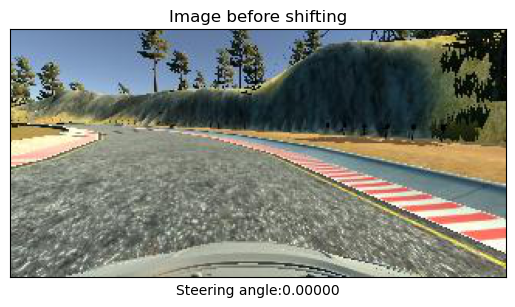

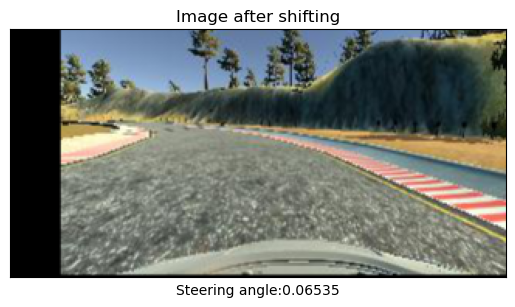

In [36]:
label = "Image before shifting"
display(img, steering_angle, label)

shifted_img,shifted_str = random_shift(img, steering_angle,100, 10)
label = "Image after shifting"
display(shifted_img, shifted_str, label)

In [38]:
def random_shadow(image):

    bright_factor = 0.3
    x = random.randint(0, image.shape[1])
    y = random.randint(0, image.shape[0])
    width = random.randint(image.shape[1], image.shape[1])
    if(x + width > image.shape[1]):
        x = image.shape[1] - x
    height = random.randint(image.shape[0], image.shape[0])
    if(y + height > image.shape[0]):
        y = image.shape[0] - y
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    image[y:y+height,x:x+width,2] = image[y:y+height,x:x+width,2]*bright_factor
    return cv2.cvtColor(image, cv2.COLOR_HSV2RGB)

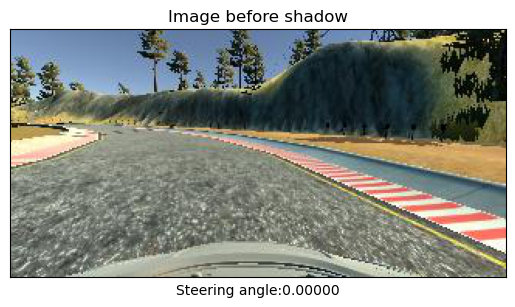

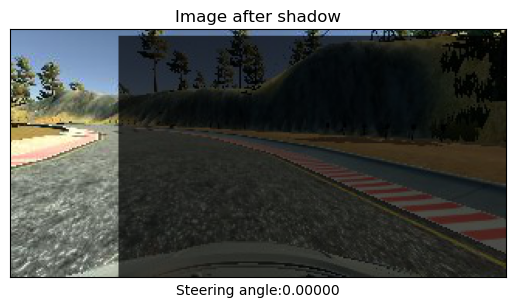

In [40]:
label = "Image before shadow"
display(img, steering_angle, label)

shadow_img = random_shadow(img)
label = "Image after shadow"
display(shadow_img, steering_angle, label)

In [42]:
def random_brightness(image):

    # HSV (Hue, Saturation, Value) is also called HSB ('B' for Brightness).
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    ratio = 1.0 + (np.random.rand() - 0.5)
    hsv[:,:,2] =  hsv[:,:,2] * ratio
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

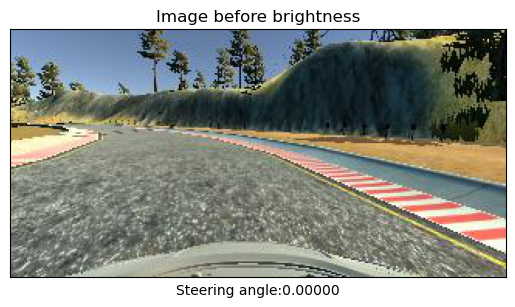

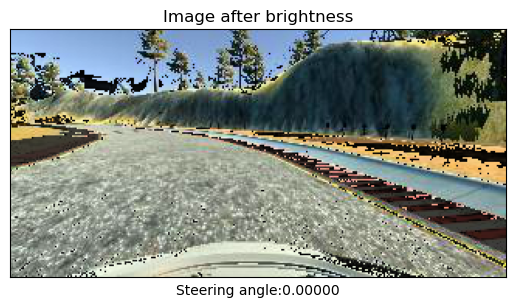

In [44]:
label = "Image before brightness"
display(img, steering_angle, label)

brightness_img = random_brightness(img)
label = "Image after brightness"
display(brightness_img, steering_angle, label)

In [55]:
#augmentation fuction 
def augument(data_dir, center, left, right, steering_angle, range_x=100, range_y=10):

    #steering angle is changing
    image, steering_angle = random_adjust(data_dir, center, left, right, steering_angle)
    image, steering_angle = random_flip(image, steering_angle)
    image, steering_angle = random_shift(image, steering_angle, range_x, range_y)
    #steering angle is not changing
    image = random_shadow(image)
    image = random_brightness(image)
    return image, steering_angle

In [57]:
#NVIDIA CNN
from keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten

def NVIDIA_model():
    
    model = Sequential()
    #normalization is done here in the below layer
    model.add(Lambda(lambda x: x/127.5-1.0, input_shape=INPUT_SHAPE))
    model.add(Conv2D(24, (5, 5), activation='elu', strides=(2, 2)))
    model.add(Conv2D(36, (5, 5), activation='elu', strides=(2, 2)))
    model.add(Conv2D(48, (5, 5), activation='elu', strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='elu'))
    model.add(Conv2D(64, (3, 3), activation='elu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(100, activation='elu'))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(10, activation='elu'))
    model.add(Dense(1))
    model.summary()
    
    model.compile(loss='mse', optimizer=Adam(learning_rate=1.0e-4))
    
    return model

In [59]:
batch_size = 40
samples_per_epoch = 20000
nb_epoch = 10

In [61]:
#batches or mini-batches are created using this custom batcher function
def batcher(data_dir, image_paths, steering_angles, batch_size, training_flag):

    images = np.empty([batch_size, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS])
    steers = np.empty(batch_size)
    while True:
        i = 0
        #permutation-take a random value/index by looking at the number of images
        #then select images randomly
        for index in np.random.permutation(image_paths.shape[0]):
            center, left, right = image_paths[index]
            steering_angle = steering_angles[index]
            if training_flag and np.random.rand() < 0.6:
                image, steering_angle = augument(data_dir, center, left, right, steering_angle)
            else:
                image = load_image(data_dir, center) 
            images[i] = preprocess(image)
            steers[i] = steering_angle
            i += 1
            if i == batch_size:
                break
        yield images, steers

In [85]:


def train_model(model, X_train, X_valid, y_train, y_valid, data_path, batch_size, samples_per_epoch, nb_epoch):
    # Define a ModelCheckpoint callback
    checkpoint = ModelCheckpoint('model-{val_loss:03f}.keras', monitor='val_loss', save_best_only=True, mode='auto')
    
    # Use fit instead of fit_generator
    model.fit(
        batcher(data_path, X_train, y_train, batch_size, True),  # Training data generator
        steps_per_epoch=samples_per_epoch // batch_size,  # Calculate steps per epoch
        epochs=nb_epoch,  # Number of epochs to train the model
        validation_data=batcher(data_path, X_valid, y_valid, batch_size, False),  # Validation data generator
        validation_steps=len(X_valid) // batch_size,  # Number of validation batches
        callbacks=[checkpoint]  # Callbacks
    )


In [89]:
train_model(
    model=NVIDIA_model(),  
    X_train=train_data, 
    X_valid=test_data, 
    y_train=train_target, 
    y_valid=test_target, 
    data_path=data_path, 
    batch_size=batch_size,  # Defined as 40
    samples_per_epoch=samples_per_epoch,  # Defined as 20000
    nb_epoch=nb_epoch  # Defined as 10
)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_7 (Lambda)               │ (None, 66, 200, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 31, 98, 24)     │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 14, 47, 36)     │        21,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 5, 22, 48)      │        43,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 3, 20, 64)      │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 1, 18, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1, 18, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │       115,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,219 (985.23 KB)

 Trainable params: 252,219 (985.23 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 100s 184ms/step - loss: 0.1046 - val_loss: 0.0474
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 81s 162ms/step - loss: 0.0873 - val_loss: 0.0477
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 165ms/step - loss: 0.0825 - val_loss: 0.0598
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 85s 170ms/step - loss: 0.0772 - val_loss: 0.0602
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 83s 166ms/step - loss: 0.0753 - val_loss: 0.0687
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 83s 166ms/step - loss: 0.0752 - val_loss: 0.0562
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 84s 168ms/step - loss: 0.0711 - val_loss: 0.0816
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 81s 161ms/step - loss: 0.0728 - val_loss: 0.0435
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 77s 155ms/step - loss: 0.0710 - val_loss: 0.0686
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 148ms/step - loss: 0.0700 - val_loss: 0.0483
